# Pre Loading Libraries

In [1]:
from keras.preprocessing.text import Tokenizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Data Loading & Exploration

In [2]:
#read data and figure out what it has.
df = pd.read_csv('/content/train.csv')
display(df.head(100))
display(df.info())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

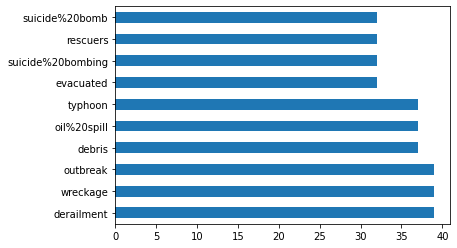

In [3]:
import seaborn as sns

df_dis = df[df['target']==1]
df_dis['keyword'].value_counts()[:10].plot(kind='barh')

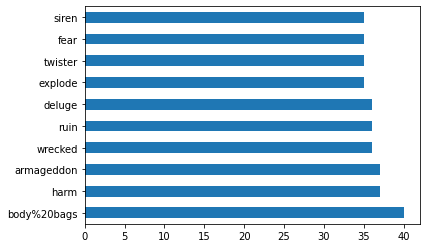

In [4]:
df_non_dis = df[df['target']==0]
df_non_dis['keyword'].value_counts()[:10].plot(kind='barh')

In [5]:
print(len(df_dis['keyword'].unique()))
print(len(df_non_dis['keyword'].unique()))

221
219


In [6]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

ret = intersection(df_dis['keyword'].unique(), df_non_dis['keyword'].unique())
print(len(ret))
print(ret)

217
['ablaze', 'accident', 'airplane%20accident', 'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging', 'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse', 'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning', 'burning%20buildings', 'bush%20fires', 'casualties', 'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'deluge', 'deluged', 'demolish', 'demolished', 'demolition', 'derail', 'derailed', 'desolate', 'desolation', 'destroy', 'destroyed', 'destruction', 'detonate', 'detonation', 'devastated', 'devastation', '

In [7]:
setDisaster = set(df_dis['keyword'].unique())
setNonDisaster = set(df_non_dis['keyword'].unique())
print(len(setDisaster))
print(len(setNonDisaster))
print(setDisaster - setNonDisaster)
print(setNonDisaster-setDisaster)

221
219
{'wreckage', 'debris', 'derailment'}
{'aftershock'}


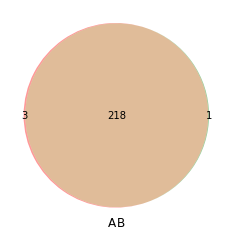

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

venn2([set(df_dis['keyword']), set(df_non_dis['keyword'])])
plt.show()


Text(0.5, 1.0, "the number of unique words of 'keyword' feature")

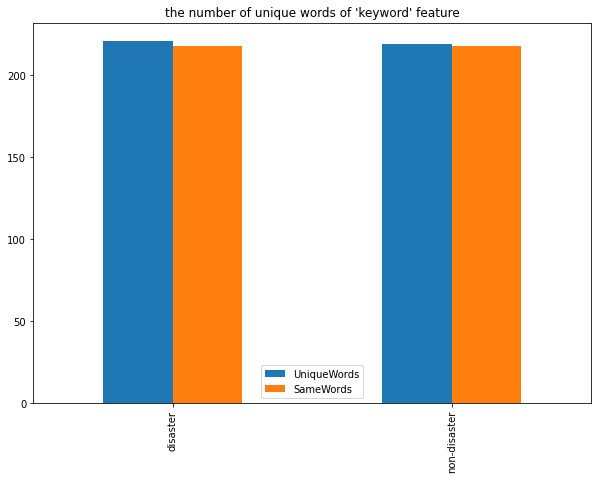

In [9]:
plotdata = pd.DataFrame({
    "UniqueWords":[221, 219],
    "SameWords":[218,218]},

    index=["disaster", "non-disaster"])

plotdata.plot(kind="bar",figsize=(10,7))
plt.title("the number of unique words of 'keyword' feature")

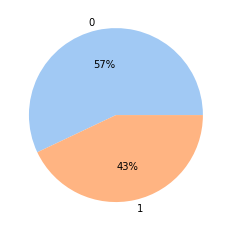

In [10]:
import seaborn as sns

#define data
data = [4342, 3271]
labels = ['0', '1']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


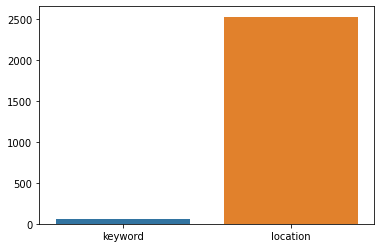

In [11]:
missing_cols = ['keyword', 'location']
sns.barplot(x=df[missing_cols].isnull().sum().index, y=df[missing_cols].isnull().sum().values)

In [12]:
display(df.head())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
df = df.drop(['id', 'keyword','location'], axis = 1)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


# Data Cleaning

**Make Characters to Lower Case**

In [14]:
df["CleanText"] = df["text"].apply(lambda x: x.lower())
df.head()

,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


**Remove unnecessary text: URL,HTML,Emojis, punctuation**

In [15]:
#remove URL
df["CleanText"] = df["CleanText"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", "",x))

In [16]:
#remove numbers
#number affect accuracy, So I decided to keep numbers.
#df["CleanText"] = df["CleanText"].apply(lambda x: re.sub(r'[0-9]', "",x))

In [17]:
#remove html
def removeHTML(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeHTML(x))

In [18]:
#remove emojis
def removeEmojis(text):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["CleanText"] = df["CleanText"].apply(lambda x: removeEmojis(x))

In [19]:
#remove '.'
def RemovePunctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["CleanText"] = df["CleanText"].apply(lambda x: RemovePunctuation(x))

In [20]:
#remove ascii code

def RemoveASCII(text):
  return re.sub(r'[^\x00-\x7f]', "", text)

df["CleanText"] = df["CleanText"].apply(lambda x: RemoveASCII(x))

In [21]:
df.head()

,text,target,CleanText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


#Data normalization ([NLTK](https://www.nltk.org/index.html)) 

**Tokenizer**

In [22]:
df['TokenizedText'] = df['CleanText'].apply(nltk.word_tokenize)

In [23]:
display(df.head())

,text,target,CleanText,TokenizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


**Remove Stopwords**

In [24]:
stop = set(stopwords.words('english'))
df['RemoveStopWords'] = df['TokenizedText'].apply(lambda x: [word for word in x if word not in stop])
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


**PorterStemmer**

What is PorterStemmer in NLP?
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

In [25]:
def doPorterStemmer(text):
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

df['PorterStemmer'] = df['RemoveStopWords'].apply(lambda x: doPorterStemmer(x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


**WordNetLemmatizer**

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [26]:
def doLemmatizeWord(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word) for word in text]
    return lemma

df['LemmatizedText'] = df['RemoveStopWords'].apply(lambda x: doLemmatizeWord(x))
df.head()


,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [27]:
#decide to use WordNetLemmatizer cuz apparently, it is better than stemming.
df['FINAL']=df['LemmatizedText'].apply(lambda x: ''.join(i+' ' for i in x))
df.head()

,text,target,CleanText,TokenizedText,RemoveStopWords,PorterStemmer,LemmatizedText,FINAL
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [28]:
#Wanted to check examples for paper.
df.to_csv("normalized_dataset.csv")

# Visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


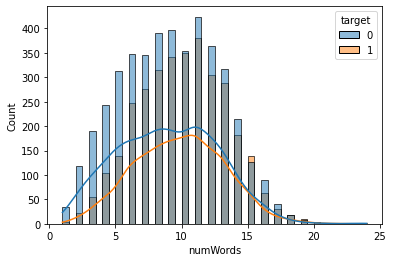

In [29]:
df['LemmatizedText']

df['numWords']= 0

for ind in df.index:
     #print(len(df['LemmatizedText'][ind]))
     df['numWords'][ind] = len(df['LemmatizedText'][ind])

sns.histplot(data=df, x="numWords", hue='target', kde=True)

In [30]:
!pip install git+https://git@github.com/kavgan/word_cloud.git

  Cloning https://****@github.com/kavgan/word_cloud.git to /tmp/pip-req-build-7_pgndqb
  Running command git clone -q 'https://****@github.com/kavgan/word_cloud.git' /tmp/pip-req-build-7_pgndqb


In [31]:
df_disaster = df[df['target']==1]
df_nodisater = df[df['target']==0]

In [32]:
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "said","you", "your", "yours", "yourself",
    "yourselves"])

In [33]:
from word_cloud.word_cloud_generator import WordCloud
from IPython.core.display import HTML

texts= df_disaster['FINAL']
wc=WordCloud(use_tfidf=False,stopwords=ENGLISH_STOP_WORDS)

embed_code=wc.get_embed_code(text=texts,random_color=False,topn=50)
HTML(embed_code)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
texts= df_nodisater['FINAL']
wc=WordCloud(use_tfidf=False,stopwords=ENGLISH_STOP_WORDS)

embed_code=wc.get_embed_code(text=texts,random_color=False,topn=50)
HTML(embed_code)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Word Embedding to transform text to Numerical data


**We will make three different numerical datasets**

**Bag Of Words using CounterVector**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
cv_df = vectorizer.fit_transform(df['FINAL'])

vectorizer.get_feature_names_out()
print(cv_df.shape)

(7613, 16270)


**Visualization**


In [36]:
#cv_arr = cv_df.toarray()
#cv_arr_df = pd.DataFrame(data=cv_arr,columns = vectorizer.get_feature_names())
#desc = cv_arr_df.describe()
 
#dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
'''
dis_countvectorizer = CountVectorizer()
cv_disaster = dis_countvectorizer.fit_transform(df_disaster['FINAL'])

nodis_countvectorizer = CountVectorizer()
cv_nodisaster = nodis_countvectorizer.fit_transform(df_nodisater['FINAL'])

sorted_cv_dis = dict(sorted(dis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
sorted_cv_nodis = dict(sorted(nodis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
'''
#print(sorted_cv_dis)
#print(sorted_cv_nodis)

#print(dis_countvectorizer.vocabulary_.keys())

"\ndis_countvectorizer = CountVectorizer()\ncv_disaster = dis_countvectorizer.fit_transform(df_disaster['FINAL'])\n\nnodis_countvectorizer = CountVectorizer()\ncv_nodisaster = nodis_countvectorizer.fit_transform(df_nodisater['FINAL'])\n\nsorted_cv_dis = dict(sorted(dis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\nsorted_cv_nodis = dict(sorted(nodis_countvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\n"

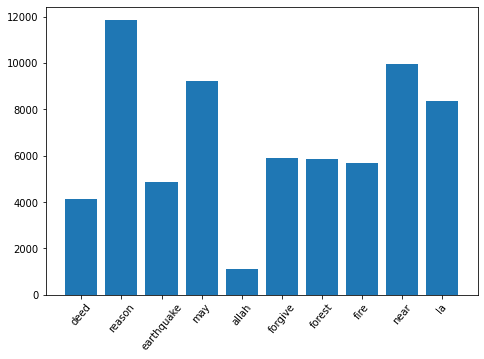

In [37]:
cv_key_list = list(vectorizer.vocabulary_.keys())
cv_values_list = list(vectorizer.vocabulary_.values())
#print(cv_key_list)
#print(cv_values_list)

import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(cv_key_list[:10], cv_values_list[:10])
plt.xticks(rotation=50)
plt.show()

**TF-IDF**


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvectorizer = TfidfVectorizer(ngram_range = (1,2))
tfidf_df = tfvectorizer.fit_transform(df['FINAL'])
print(tfidf_df.shape)

(7613, 63245)


 **visualization**

In [39]:
'''dis_tdidfvectorizer = CountVectorizer()
tdidf_disaster = dis_tdidfvectorizer.fit_transform(df_disaster['FINAL'])

nodis_tdidfvectorizer = CountVectorizer()
tdidf_nodisaster = nodis_tdidfvectorizer.fit_transform(df_nodisater['FINAL'])

#print(dis_tdidfvectorizer.vocabulary_)
#print(nodis_tdidfvectorizer.vocabulary_)

sorted_tdidf_dis = dict(sorted(dis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))
sorted_tdidf_nodis = dict(sorted(nodis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))

#print(sorted_tdidf_dis)
#print(sorted_tdidf_nodis)'''

"dis_tdidfvectorizer = CountVectorizer()\ntdidf_disaster = dis_tdidfvectorizer.fit_transform(df_disaster['FINAL'])\n\nnodis_tdidfvectorizer = CountVectorizer()\ntdidf_nodisaster = nodis_tdidfvectorizer.fit_transform(df_nodisater['FINAL'])\n\n#print(dis_tdidfvectorizer.vocabulary_)\n#print(nodis_tdidfvectorizer.vocabulary_)\n\nsorted_tdidf_dis = dict(sorted(dis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\nsorted_tdidf_nodis = dict(sorted(nodis_tdidfvectorizer.vocabulary_.items(), key=lambda item: item[1],reverse=True))\n\n#print(sorted_tdidf_dis)\n#print(sorted_tdidf_nodis)"

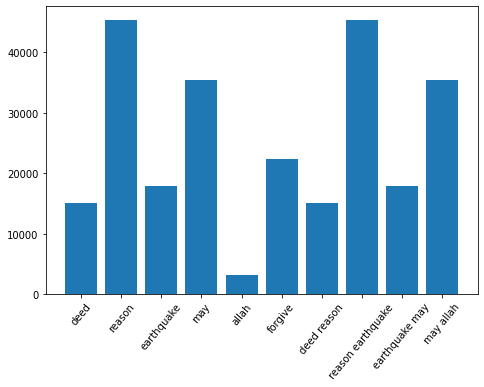

In [40]:

tfidf_key_list = list(tfvectorizer.vocabulary_.keys())
tfidf_values_list = list(tfvectorizer.vocabulary_.values())
#print(tfidf_key_list)
#print(tfidf_values_list)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tfidf_key_list[:10], tfidf_values_list[:10])
plt.xticks(rotation=50)
plt.show()

**Word2Vec**

In [41]:
from gensim.models import Word2Vec, KeyedVectors
import nltk
import multiprocessing

In [42]:
sentences = df['FINAL'].values
sentences = [nltk.word_tokenize(sent) for sent in sentences]


In [43]:
#print(sentences)

In [44]:
#print(list(df['LemmatizedText']))

In [45]:
w2v_size = 300

In [46]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=w2v_size,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


In [47]:
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1441465, 2133030)

In [48]:
w2v_model.wv.similarity("fire", 'wildfire')

0.97628087

In [49]:
w2v_model.wv.most_similar(positive=["disaster"])


[('declares', 0.9981396198272705),
 ('sign', 0.9976129531860352),
 ('declaration', 0.9946792125701904),
 ('marians', 0.9946218729019165),
 ('obama', 0.9945011138916016),
 ('saipan', 0.9932451844215393),
 ('typhoondevastated', 0.9889606833457947),
 ('northern', 0.9873850345611572),
 ('abcnews', 0.8922840356826782),
 ('losdelsonido', 0.8917478322982788)]

In [50]:
w2v_model.wv.most_similar(positive=["evacuation"])


[('faan', 0.9996618628501892),
 ('order', 0.9995802044868469),
 ('ultimatum', 0.9994150400161743),
 ('floated', 0.9993795156478882),
 ('th', 0.9993643760681152),
 ('almost', 0.9993605017662048),
 ('noted', 0.9993528127670288),
 ('probability', 0.9993262887001038),
 ('innocent', 0.9993257522583008),
 ('jet', 0.9993158578872681)]

In [51]:
w2v_model.wv.most_similar(positive=["injury"])


[('thought', 0.9998412728309631),
 ('store', 0.99982750415802),
 ('ill', 0.999819278717041),
 ('2005', 0.9998190402984619),
 ('nobody', 0.9998188018798828),
 ('idk', 0.9998180270195007),
 ('basic', 0.9998174905776978),
 ('changed', 0.9998173117637634),
 ('bunch', 0.9998156428337097),
 ('previous', 0.9998143911361694)]

In [52]:
words = list(w2v_model.wv.vocab)
#words

In [53]:
w2v_df = []
for sent in sentences:
    vw = np.zeros(w2v_size) 
    #one sentence has many words
    for word in sent:
        vw += w2v_model[word]
    #average
    vw = vw/len(sent)
    w2v_df.append(np.array(vw))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [54]:
print(len(w2v_df))
print(len(w2v_df[0]))

#print(w2v_model['earthquake'])

7613
300


## Word2Vec with Visualization (reference - 

In [55]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def word2vec_scatterplot(model, word, list_names):

    arrays = np.empty((0, w2v_size), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality with PCA
    reduc = PCA(n_components=21).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


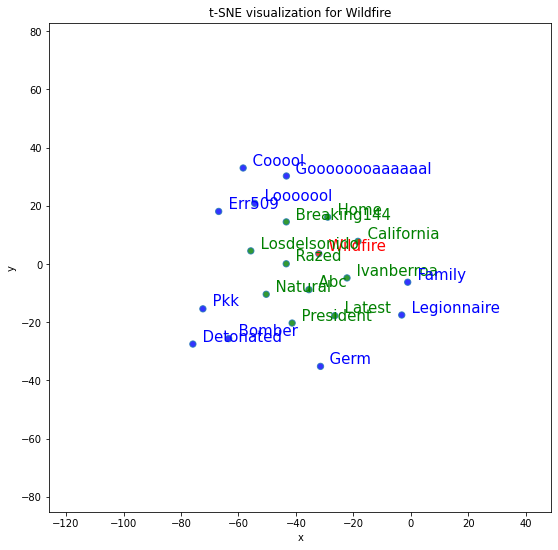

In [56]:
word2vec_scatterplot(w2v_model, 'wildfire', [i[0] for i in w2v_model.wv.most_similar(negative=["wildfire"])])

# Reduce Dimension PCA 

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

trans_w2v_df = StandardScaler().fit_transform(w2v_df)

#reduce dimention half
pca = PCA(n_components=100)
pca_trans_w2v_df = pca.fit_transform(trans_w2v_df)

print(pca_trans_w2v_df.shape) 

df_pca_visual = pd.DataFrame({'com1': pca_trans_w2v_df[:,1], 'com2': pca_trans_w2v_df[:,2]})
display(df_pca_visual.head())

df_pca_visual['target'] = df['target']
display(df_pca_visual.head())

#sns.scatterplot(data=df_pca_visual, x="com1", y="com2", hue="target")

(7613, 100)


,com1,com2
0,-0.205661,-0.100516
1,-1.284535,-1.357988
2,-0.359001,-0.019595
3,-2.423278,4.181328
4,-1.709226,1.066033


,com1,com2,target
0,-0.205661,-0.100516,1
1,-1.284535,-1.357988,1
2,-0.359001,-0.019595,1
3,-2.423278,4.181328,1
4,-1.709226,1.066033,1


In [58]:
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

trans_w2v_df = StandardScaler().fit_transform(w2v_df)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda_w2v_df = lda.fit_transform(trans_w2v_df, df['target'])
print(lda_w2v_df.shape) 


lda_w2v_df_visual = pd.DataFrame({'lda_com': lda_w2v_df[:,0]})
display(lda_w2v_df_visual.head())

lda_w2v_df_visual['target'] = df['target']
display(lda_w2v_df_visual.head())


import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="lda_com" ,y="target" , data=lda_w2v_df_visual)'''
  

'\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\n\ntrans_w2v_df = StandardScaler().fit_transform(w2v_df)\n\n# apply Linear Discriminant Analysis\nlda = LinearDiscriminantAnalysis(n_components=1)\nlda_w2v_df = lda.fit_transform(trans_w2v_df, df[\'target\'])\nprint(lda_w2v_df.shape) \n\n\nlda_w2v_df_visual = pd.DataFrame({\'lda_com\': lda_w2v_df[:,0]})\ndisplay(lda_w2v_df_visual.head())\n\nlda_w2v_df_visual[\'target\'] = df[\'target\']\ndisplay(lda_w2v_df_visual.head())\n\n\nimport seaborn as sns\nsns.set_theme(style="whitegrid")\nax = sns.stripplot(x="lda_com" ,y="target" , data=lda_w2v_df_visual)'

(7613, 2)


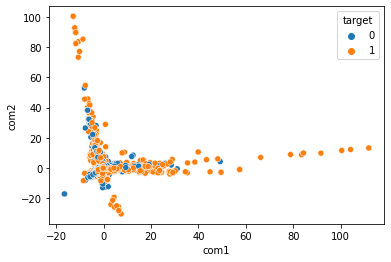

In [59]:
# This is for visualization code
from sklearn.decomposition import PCA

pca_visual = PCA(n_components=2)
df_visual = pca_visual.fit_transform(trans_w2v_df)
print(df_visual.shape) 

df_pca_visual = pd.DataFrame(df_visual, columns=['com1', 'com2'])
#display(df_pca_visual.head())

df_pca_visual['target'] = df['target']
#display(df_pca_visual.head())
sns.scatterplot(data=df_pca_visual, x="com1", y="com2", hue="target")


# Data Split

In [60]:
cv_df.shape

(7613, 16270)

In [61]:
tfidf_df.shape

(7613, 63245)

In [62]:
print(len(w2v_df))
print(len(w2v_df[0]))

7613
300


In [63]:
pca_trans_w2v_df.shape

(7613, 100)

In [64]:
from sklearn.model_selection import train_test_split

cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)

In [65]:
cv_train_X.shape

(5329, 16270)

In [66]:
cv_test_y.shape

(2284,)

In [67]:
tfidf_train_X.shape

(5329, 63245)

In [68]:
pca_w2v_train_X.shape

(5329, 100)

# *LogisticRegression* best CV 0.801




In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_Logistic(train_X, test_X, train_y, test_y) :
  logisticRegr = LogisticRegression()
  logisticRegr.fit(train_X, train_y)
  pred_y = logisticRegr.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


In [70]:
#model_Logistic(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
#model_Logistic(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
#model_Logistic(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
#model_Logistic(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)

**LogitricRegression with CountVector has better accuracy**


In [71]:
#cv_train_X, cv_test_X, cv_train_Y, cv_test_y

'''
#To find best tuning option


group_c = [10, 5, 1, 0.1, 0.001]

for c in group_c:
    logistic_lasso = LogisticRegression(C=c, penalty='l1', tol=0.001, solver='liblinear', random_state=42,  max_iter=10000) #lasso
    logistic_ridge = LogisticRegression(C=c, penalty='l2', tol=0.001, solver='liblinear', random_state=42, max_iter=10000)  #Ridge 
    l_ela = LogisticRegression(C=c, penalty='elasticnet', solver='saga', l1_ratio=0.5, tol=0.001, max_iter=10000)
    
    logistic_lasso.fit(cv_train_X, cv_train_Y.values.ravel())
    logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())
    l_ela.fit(cv_train_X, cv_train_Y.values.ravel())
    
    coef_l1_LR = logistic_lasso.coef_.ravel()
    coef_l2_LR = logistic_ridge.coef_.ravel()
    coef_ela_LR = l_ela.coef_.ravel()
    
    # coef_l1_LR contains zeros due to the L1 sparsity inducing norm
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100 
    sparsity_l_ela = np.mean(coef_ela_LR == 0) * 100 

    print("\n C=%.5f" % c)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Ela penalty:", sparsity_l_ela))
    print("{:<40} {:.3f}".format("Score with L1 penalty:", logistic_lasso.score(cv_test_X, cv_test_y.values.ravel())))  #lasso score
    print("{:<40} {:.3f}".format("Score with L2 penalty:",logistic_ridge.score(cv_test_X, cv_test_y.values.ravel())))   #ridge score
    print("{:<40} {:.3f}".format("Score with Ela penalty:",l_ela.score(cv_test_X, cv_test_y.values.ravel())))   #elastic score

'''

'\n#To find best tuning option\n\n\ngroup_c = [10, 5, 1, 0.1, 0.001]\n\nfor c in group_c:\n    logistic_lasso = LogisticRegression(C=c, penalty=\'l1\', tol=0.001, solver=\'liblinear\', random_state=42,  max_iter=10000) #lasso\n    logistic_ridge = LogisticRegression(C=c, penalty=\'l2\', tol=0.001, solver=\'liblinear\', random_state=42, max_iter=10000)  #Ridge \n    l_ela = LogisticRegression(C=c, penalty=\'elasticnet\', solver=\'saga\', l1_ratio=0.5, tol=0.001, max_iter=10000)\n    \n    logistic_lasso.fit(cv_train_X, cv_train_Y.values.ravel())\n    logistic_ridge.fit(cv_train_X, cv_train_Y.values.ravel())\n    l_ela.fit(cv_train_X, cv_train_Y.values.ravel())\n    \n    coef_l1_LR = logistic_lasso.coef_.ravel()\n    coef_l2_LR = logistic_ridge.coef_.ravel()\n    coef_ela_LR = l_ela.coef_.ravel()\n    \n    # coef_l1_LR contains zeros due to the L1 sparsity inducing norm\n    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100\n    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100 \n    spars

**Best parameters**

accuracy_score: 0.801
Recall: 0.687
Precision: 0.826
F1 Score: 0.750


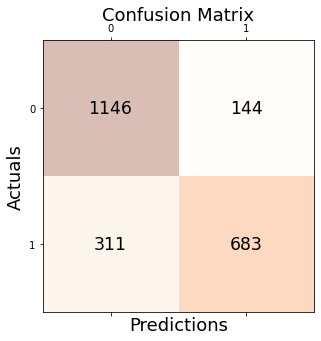

In [72]:
''' BEST OPTION'''
#cv_train_X, cv_test_X, cv_train_Y, cv_test_y

logisticRegr = LogisticRegression(C=0.45, penalty='l2', tol=0.01, solver='liblinear', random_state=42, max_iter=100)
logisticRegr.fit(cv_train_X, cv_train_Y)
pred_y = logisticRegr.predict(cv_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, pred_y))


conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Model - SVM Best cv 0.800

In [73]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


 
def model_SVM(train_X, test_X, train_y, test_y) :
  svm_clf = svm.SVC()
  svm_clf= svm_clf.fit(train_X, train_y)
  pred_y = svm_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))

**Training three datasets on Basic SVM and Prediction/Accuracy**

In [74]:
'''
model_SVM(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_SVM(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_SVM(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_SVM(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)
'''

'\nmodel_SVM(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)\nmodel_SVM(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)\nmodel_SVM(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)\nmodel_SVM(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)\n'

**SVM with CounterVector has higher accuracy**

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def testModel(train_x, test_x, train_y, test_y, _c, _gam, _kn):
  SVM = svm.SVC(kernel=_kn, C=_c)
  SVM.fit(train_x, train_y)
  pred_y = SVM.predict(test_x)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  #print('Recall: %.3f' % recall_score(test_y, pred_y))
  #print('Precision: %.3f' % precision_score(test_y, pred_y))
  #print('F1 Score: %.3f' % f1_score(test_y, pred_y))

  '''
  conf_matrix = confusion_matrix(y_true=test_y, y_pred=pred_y)
  #
  # Print the confusion matrix using Matplotlib
  #
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  '''

'''
group_c = [5, 1, 0.1, 0.05, 0.01, 0.001]
group_gam = [5, 1, 0.1, 0.05, 0.01, 0.001]

for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'linear')


for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')


for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'poly')


for c in group_c:
  print("C value:", c)
  for gam in group_gam:
    print("gam value:", gam)
    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'sigmoid')

#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'linear')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, 'rbf')
#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'poly')

#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'sigmoid')

'''

'\ngroup_c = [5, 1, 0.1, 0.05, 0.01, 0.001]\ngroup_gam = [5, 1, 0.1, 0.05, 0.01, 0.001]\n\nfor c in group_c:\n  print("C value:", c)\n  for gam in group_gam:\n    print("gam value:", gam)\n    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, \'linear\')\n\n\nfor c in group_c:\n  print("C value:", c)\n  for gam in group_gam:\n    print("gam value:", gam)\n    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, \'rbf\')\n\n\nfor c in group_c:\n  print("C value:", c)\n  for gam in group_gam:\n    print("gam value:", gam)\n    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, \'poly\')\n\n\nfor c in group_c:\n  print("C value:", c)\n  for gam in group_gam:\n    print("gam value:", gam)\n    testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, \'sigmoid\')\n\n#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, \'linear\')\n#testModel(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, c, gam, \'rbf\')\n#testModel(cv_train_X, cv_test

accuracy_score: 0.800
Recall: 0.668
Precision: 0.839
F1 Score: 0.744


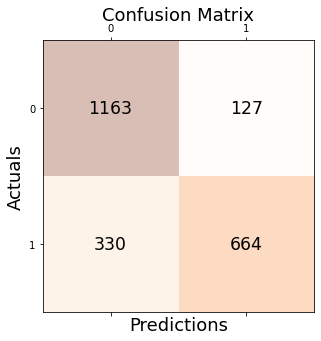

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

'''Best option'''

def svm_model(train_x, test_x, train_y, test_y, _c, _gam, _kn):
  SVM = svm.SVC(kernel=_kn, C=_c)
  SVM.fit(train_x, train_y)
  pred_y = SVM.predict(test_x)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))

  conf_matrix = confusion_matrix(y_true=test_y, y_pred=pred_y)
  #
  # Print the confusion matrix using Matplotlib
  #
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  
svm_model(cv_train_X, cv_test_X, cv_train_Y, cv_test_y, 1, 'auto', 'sigmoid')

# DecisionTree best Tf-Idf 0.756

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_DT (train_X, test_X, train_y, test_y) :
  clf = DecisionTreeClassifier()
  clf.fit(train_X, train_y)
  pred_y = clf.predict(test_X)
  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))


In [78]:
'''
model_DT(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_DT(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_DT(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
model_DT(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)
'''

'\nmodel_DT(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)\nmodel_DT(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)\nmodel_DT(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)\nmodel_DT(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)\n'

**Decision Tree with Td-Idf is higher accuracy.**

In [79]:
def test_dt(x_train, x_test, y_train, y_test) :
    print()
    for c_depth in [2, 4, 6, 8, 10, 12, 20, 30, None] : 
        print("model selection depth = {0}".format(c_depth))
        clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=c_depth,  random_state=27)
        clf_gini.fit(x_train, y_train)
        y_pred = clf_gini.predict(x_test)
        print('gini accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

        clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=c_depth,  random_state=27)
        clf_entropy.fit(x_train, y_train)
        y_pred = clf_entropy.predict(x_test)
        print('entropy accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

#test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)

In [80]:

def test_dt(x_train, x_test, y_train, y_test) :
    print()
    for min_sp in [2, 4, 6, 8, 10, 12, 20] : 
      clf_gini = DecisionTreeClassifier(min_samples_split=min_sp,  random_state=27)
      clf_gini.fit(x_train, y_train)
      y_pred = clf_gini.predict(x_test)
      print('gini accuracy_score: %.3f' % accuracy_score(y_test, y_pred))

#test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)

accuracy_score: 0.756
Recall: 0.681
Precision: 0.737
F1 Score: 0.708


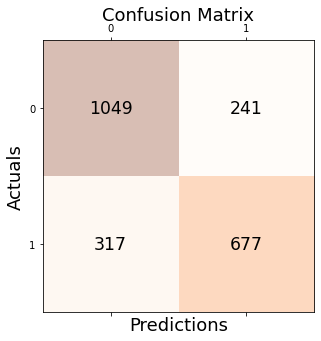

In [81]:
#test_dt(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)

'''
  find best option

def __init__(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
'''

clf = DecisionTreeClassifier(min_samples_split=10, random_state=27)
clf.fit(tfidf_train_X, tfidf_train_Y)
pred_y = clf.predict(tfidf_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(tfidf_test_y, pred_y))
print('Recall: %.3f' % recall_score(tfidf_test_y, pred_y))
print('Precision: %.3f' % precision_score(tfidf_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(tfidf_test_y, pred_y))


conf_matrix = confusion_matrix(y_true=tfidf_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# RandomForestClassifier CV 0.799

In [82]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
 
def model_randomForestClf(train_X, test_X, train_y, test_y) :
  rf_clf = RandomForestClassifier(random_state=42)
  rf_clf = rf_clf.fit(train_X, train_y)
  pred_y = rf_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)
'''

#model_randomForestClf(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
#model_randomForestClf(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
#model_randomForestClf(w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y)
#model_randomForestClf(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)


"\ncv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)\ntfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)\nw2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)\npca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)\n"

In [83]:
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y
'''
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42,
                                class_weight="balanced", min_samples_split=12)
rf_clf = rf_clf.fit(cv_train_X, cv_train_Y)
pred_y = rf_clf.predict(cv_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, pred_y))

accuracy_score: 0.799
Recall: 0.704
Precision: 0.809
F1 Score: 0.753


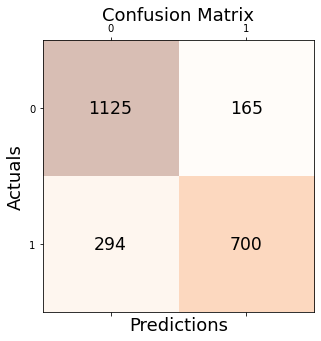

In [84]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Xgboost best with pca_w2v - 0.778

---



In [85]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
 

def model_Xgboost(train_X, test_X, train_y, test_y) :
  xgb_clf = XGBClassifier(seed=27)
  xgb_clf.fit(train_X, train_y)
  pred_y = xgb_clf.predict(test_X)

  #Accuracy
  print('accuracy_score: %.3f' % accuracy_score(test_y, pred_y))
  print('Recall: %.3f' % recall_score(test_y, pred_y))
  print('Precision: %.3f' % precision_score(test_y, pred_y))
  print('F1 Score: %.3f' % f1_score(test_y, pred_y))
  print(xgb_clf)


model_Xgboost(cv_train_X, cv_test_X, cv_train_Y, cv_test_y)
model_Xgboost(tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y)
model_Xgboost(np.array(w2v_train_X), w2v_test_X, w2v_train_Y, w2v_test_y)
model_Xgboost(pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y)


accuracy_score: 0.713
Recall: 0.402
Precision: 0.868
F1 Score: 0.550
XGBClassifier(seed=27)
accuracy_score: 0.729
Recall: 0.446
Precision: 0.865
F1 Score: 0.588
XGBClassifier(seed=27)
accuracy_score: 0.736
Recall: 0.579
Precision: 0.756
F1 Score: 0.656
XGBClassifier(seed=27)
accuracy_score: 0.754
Recall: 0.608
Precision: 0.779
F1 Score: 0.683
XGBClassifier(seed=27)


In [86]:
xgb_clf = XGBClassifier(learning_rate =0.1,
     n_estimators=135,
     max_depth=10,
     min_child_weight=1,
     gamma=0.05,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)
print(xgb_clf)

xgb_clf = xgb_clf.fit(pca_w2v_train_X, pca_w2v_train_Y)
pred_y = xgb_clf.predict(pca_w2v_test_X)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(pca_w2v_test_y, pred_y))
print('Recall: %.3f' % recall_score(pca_w2v_test_y, pred_y))
print('Precision: %.3f' % precision_score(pca_w2v_test_y, pred_y))
print('F1 Score: %.3f' % f1_score(pca_w2v_test_y, pred_y))
print()

XGBClassifier(colsample_bytree=0.8, gamma=0.05, max_depth=10, n_estimators=135,
              nthread=4, seed=27, subsample=0.8)
accuracy_score: 0.761
Recall: 0.637
Precision: 0.773
F1 Score: 0.698



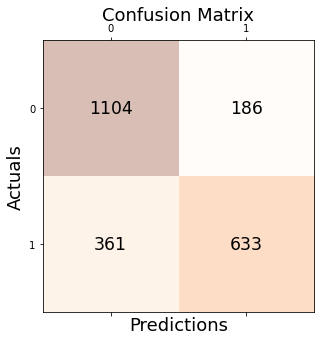

In [87]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=pca_w2v_test_y, y_pred=pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# LSTM [GLOVE](https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt) -0.803 ~ 0.813 

In [97]:
from keras.preprocessing.text import Tokenizer
#import tensorflow as tf
from tensorflow.keras.utils import pad_sequences
from keras.layers import Dense,Dropout,LSTM,SimpleRNN,Embedding,Bidirectional,LSTM,GlobalMaxPool1D
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

'''
from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(1)
'''

'\nfrom numpy.random import seed\nseed(1)\n\nimport tensorflow as tf\ntf.random.set_seed(1)\n'

In [98]:
! pip install keras

In [99]:
tweets = df['FINAL'].values

In [100]:
#This Tokenizer is by Keras
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(tweets)
vocab_length = len(word_tokenizer.word_index) + 1

#None values is embedding by 0
def embedding_by_using_keras(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [101]:
longest_tweet = max(tweets, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_tweet))

#create values to make it the same input size.
padded_sentences = pad_sequences(embedding_by_using_keras(tweets), length_long_sentence, padding='post')

In [102]:

pad_X_train, pad_X_test, pad_y_train, pad_y_test = train_test_split(padded_sentences, df['target'], test_size=0.30, random_state=17)

## GLOVE

In [103]:
#create embedding dictionary from glove txt file of Stanford.
embeddings_dictionary = dict()
embedding_dim = 100

glove_file = open('/content/glove.6B.100d.txt',encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [104]:
embeddings_dictionary['disaster'].shape

(100,)

In [105]:
#Create embedding vector matrix with vocaburay made by this tweets data set
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [106]:
print(embedding_matrix.shape)

(16303, 100)


In [107]:
def BLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights = [embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [108]:
model_LSTM = BLSTM()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model_LSTM.fit(
    pad_X_train, 
    pad_y_train, 
    epochs = 7,
    batch_size = 32,
    #validation_data = [pad_X_test, pad_y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
167/167 [==============================] - 114s 574ms/step - loss: 0.7920 - accuracy: 0.5620 - lr: 0.0010
Epoch 2/7
167/167 [==============================] - 59s 351ms/step - loss: 0.6256 - accuracy: 0.6692 - lr: 0.0010
Epoch 3/7
167/167 [==============================] - 58s 349ms/step - loss: 0.5520 - accuracy: 0.7320 - lr: 0.0010
Epoch 4/7
167/167 [==============================] - 59s 353ms/step - loss: 0.4946 - accuracy: 0.7896 - lr: 0.0010
Epoch 5/7
167/167 [==============================] - 57s 343ms/step - loss: 0.4671 - accuracy: 0.8075 - lr: 0.0010
Epoch 6/7
167/167 [==============================] - 59s 351ms/step - loss: 0.4344 - accuracy: 0.8292 - lr: 0.0010
Epoch 7/7
167/167 [==============================] - 57s 340ms/step - loss: 0.4284 - accuracy: 0.8319 - lr: 0.0010


In [109]:
loss, accuracy = model_LSTM.evaluate(pad_X_test, pad_y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

72/72 [==============================] - 3s 26ms/step - loss: 0.4225 - accuracy: 0.8227
Loss: 0.4225492775440216
Accuracy: 0.8226795196533203


In [110]:
lstm_glv_pred_y = (model_LSTM.predict(pad_X_test) > 0.5).astype("int32")
lstm_glv_pred_y_prob = model_LSTM.predict(pad_X_test)

72/72 [==============================] - 5s 63ms/step


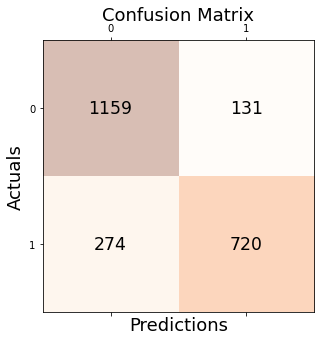

In [111]:

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=pad_y_test, y_pred=lstm_glv_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# LSTM with Word2Vec - 0.781

In [112]:
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1441465, 2133030)

In [113]:
# total numberof extracted words.
w2v_vocab=w2v_model.wv.vocab
print("The total number of words are : ",len(w2v_vocab))

w2v_vocab=list(w2v_vocab.keys())

w2v_dictionary={}
for word in w2v_vocab:
  w2v_dictionary[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(w2v_dictionary)) # should come equal to vocab size


The total number of words are :  16302
The no of key-value pairs :  16302


In [114]:
# now creating the embedding matrix
embedding_matrix_by_word2vec =np.zeros(shape=(vocab_length, 100))

for word, index in word_tokenizer.word_index.items():
  embedding_vector = w2v_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix_by_word2vec[index]=embedding_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [115]:
def BLSTM_W2V():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix_by_word2vec.shape[0], 
                        output_dim=embedding_matrix_by_word2vec.shape[1], 
                        weights = [embedding_matrix_by_word2vec], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [116]:
model_LSTM_W2V = BLSTM_W2V()
checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model_LSTM_W2V.fit(
    pad_X_train, 
    pad_y_train, 
    epochs = 7,
    batch_size = 32,
    #validation_data = [pad_X_test, pad_y_test],
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
167/167 [==============================] - 66s 353ms/step - loss: 0.7307 - accuracy: 0.5489 - lr: 0.0010
Epoch 2/7
167/167 [==============================] - 59s 351ms/step - loss: 0.6561 - accuracy: 0.6204 - lr: 0.0010
Epoch 3/7
167/167 [==============================] - 59s 352ms/step - loss: 0.5520 - accuracy: 0.7422 - lr: 0.0010
Epoch 4/7
167/167 [==============================] - 60s 362ms/step - loss: 0.4613 - accuracy: 0.8150 - lr: 0.0010
Epoch 5/7
167/167 [==============================] - 59s 350ms/step - loss: 0.3979 - accuracy: 0.8521 - lr: 0.0010
Epoch 6/7
167/167 [==============================] - 58s 347ms/step - loss: 0.3389 - accuracy: 0.8795 - lr: 0.0010
Epoch 7/7
167/167 [==============================] - 59s 353ms/step - loss: 0.2977 - accuracy: 0.9022 - lr: 0.0010


In [117]:
loss, accuracy = model_LSTM_W2V.evaluate(pad_X_test, pad_y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

72/72 [==============================] - 3s 26ms/step - loss: 0.7235 - accuracy: 0.7369
Loss: 0.7235027551651001
Accuracy: 0.7368651628494263


In [118]:
lstm_w2v_pred_y = (model_LSTM_W2V.predict(pad_X_test) > 0.5).astype("int32")
lstm_w2v_pred_y_prob = model_LSTM_W2V.predict(pad_X_test)

72/72 [==============================] - 2s 22ms/step


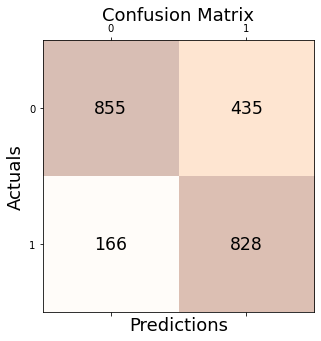

In [119]:

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=pad_y_test, y_pred=lstm_w2v_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Custom Ensemble
# (SVM+CV, LogisticR+CV, DT+tfidf, RandomF+cv, Xgboost+pca_word2vec) 
# (SVM+CV, LogisticR+CV, DT+tfidf, RandomF+cv, Xgboost+pca_word2vec + LSTM+glove) 

In [120]:
'''
cv_train_X, cv_test_X, cv_train_Y, cv_test_y = train_test_split(cv_df, df['target'], test_size=0.30, random_state=17)
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_y = train_test_split(tfidf_df, df['target'], test_size=0.30, random_state=17)
w2v_train_X, w2v_test_X, w2v_train_Y, w2v_test_y = train_test_split(w2v_df, df['target'], test_size=0.30, random_state=17)
pca_w2v_train_X, pca_w2v_test_X, pca_w2v_train_Y, pca_w2v_test_y = train_test_split(pca_trans_w2v_df, df['target'], test_size=0.30, random_state=17)
'''
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

cus_en_lr = LogisticRegression(C=0.45, penalty='l2', tol=0.01, solver='liblinear', random_state=42, max_iter=100)
cus_en_svm = svm.SVC(kernel='sigmoid', probability=True)
cus_en_dt = DecisionTreeClassifier(min_samples_split=10, random_state=27)
cus_en_rd = RandomForestClassifier(n_estimators=250, random_state=42,
                                class_weight="balanced", min_samples_split=12)
cus_xgb_clf = XGBClassifier(learning_rate =0.1,
     n_estimators=135,
     max_depth=10,
     min_child_weight=1,
     gamma=0.05,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     seed=27)

cus_en_lr.fit(cv_train_X, cv_train_Y)
cus_en_svm.fit(cv_train_X, cv_train_Y)
cus_en_dt.fit(tfidf_train_X, tfidf_train_Y)
cus_en_rd.fit(cv_train_X, cv_train_Y)
cus_xgb_clf.fit(pca_w2v_train_X, pca_w2v_train_Y)

lr_pred_y = cus_en_lr.predict(cv_test_X)
svm_pred_y = cus_en_svm.predict(cv_test_X)
dt_pred_y = cus_en_dt.predict(tfidf_test_X)
rd_pred_y = cus_en_rd.predict(cv_test_X)
xgb_pred_y = cus_xgb_clf.predict(pca_w2v_test_X)


lr_pred_y_prob = cus_en_lr.predict_proba(cv_test_X)
svm_pred_y_prob = cus_en_svm.predict_proba(cv_test_X)
dt_pred_y_prob = cus_en_dt.predict_proba(tfidf_test_X)
rd_pred_y_prob = cus_en_rd.predict_proba(cv_test_X)
xgb_pred_y_prob = cus_xgb_clf.predict_proba(pca_w2v_test_X)


In [121]:
combined_pred_y = []

for idx in range(cv_test_y.shape[0]):
  if (lr_pred_y[idx]+svm_pred_y[idx]+rd_pred_y[idx]+dt_pred_y[idx]+xgb_pred_y[idx]>=3):
    combined_pred_y.append(1);
  else :
    combined_pred_y.append(0);

In [122]:
lr_pred_y.shape
combined_pred_y = np.asarray(combined_pred_y)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, combined_pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, combined_pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, combined_pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, combined_pred_y))


accuracy_score: 0.809
Recall: 0.694
Precision: 0.838
F1 Score: 0.759


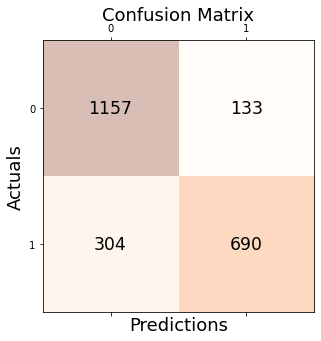

In [123]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=combined_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [124]:
'''
combined_pred_y_prob = []
for idx in range(cv_test_y.shape[0]):
  max_neg = max([lr_pred_y_prob[idx][0],svm_pred_y_prob[idx][0],
                 rd_pred_y_prob[idx][0],xgb_pred_y_prob[idx][0], dt_pred_y_prob[idx][0]])
  max_pos = max([lr_pred_y_prob[idx][1],svm_pred_y_prob[idx][1],
                 rd_pred_y_prob[idx][1],xgb_pred_y_prob[idx][1], dt_pred_y_prob[idx][1]])
  
  if (max_neg<max_pos):
    combined_pred_y_prob.append(1);
  else :
    combined_pred_y_prob.append(0);

print("\n probability: \n")

#combined_pred_y_prob = np.asarray(combined_pred_y_prob)

#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, combined_pred_y_prob))
print('Recall: %.3f' % recall_score(cv_test_y, combined_pred_y_prob))
print('Precision: %.3f' % precision_score(cv_test_y, combined_pred_y_prob))
print('F1 Score: %.3f' % f1_score(cv_test_y, combined_pred_y_prob))
'''


'\ncombined_pred_y_prob = []\nfor idx in range(cv_test_y.shape[0]):\n  max_neg = max([lr_pred_y_prob[idx][0],svm_pred_y_prob[idx][0],\n                 rd_pred_y_prob[idx][0],xgb_pred_y_prob[idx][0], dt_pred_y_prob[idx][0]])\n  max_pos = max([lr_pred_y_prob[idx][1],svm_pred_y_prob[idx][1],\n                 rd_pred_y_prob[idx][1],xgb_pred_y_prob[idx][1], dt_pred_y_prob[idx][1]])\n  \n  if (max_neg<max_pos):\n    combined_pred_y_prob.append(1);\n  else :\n    combined_pred_y_prob.append(0);\n\nprint("\n probability: \n")\n\n#combined_pred_y_prob = np.asarray(combined_pred_y_prob)\n\n#Accuracy\nprint(\'accuracy_score: %.3f\' % accuracy_score(cv_test_y, combined_pred_y_prob))\nprint(\'Recall: %.3f\' % recall_score(cv_test_y, combined_pred_y_prob))\nprint(\'Precision: %.3f\' % precision_score(cv_test_y, combined_pred_y_prob))\nprint(\'F1 Score: %.3f\' % f1_score(cv_test_y, combined_pred_y_prob))\n'

## (SVM+CV, LogisticR+CV, DT+tfidf, RandomF+cv, Xgboost+pca_word2vec + LSTM+glove) 0.81X

In [125]:
all_combined_pred_y = []

for idx in range(cv_test_y.shape[0]):
  if (lr_pred_y[idx]+svm_pred_y[idx]+rd_pred_y[idx]+dt_pred_y[idx]+xgb_pred_y[idx]+lstm_glv_pred_y[idx]>3):
    all_combined_pred_y.append(1);
  else :
    all_combined_pred_y.append(0);


#Accuracy
print('accuracy_score: %.3f' % accuracy_score(cv_test_y, all_combined_pred_y))
print('Recall: %.3f' % recall_score(cv_test_y, all_combined_pred_y))
print('Precision: %.3f' % precision_score(cv_test_y, all_combined_pred_y))
print('F1 Score: %.3f' % f1_score(cv_test_y, all_combined_pred_y))


accuracy_score: 0.813
Recall: 0.679
Precision: 0.862
F1 Score: 0.760


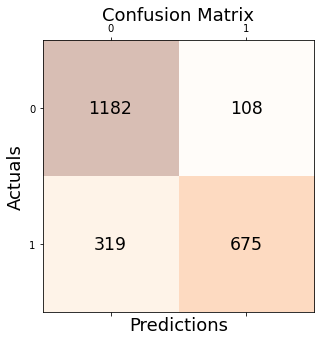

In [126]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=cv_test_y, y_pred=all_combined_pred_y)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#Bert Model

In [127]:
# loading the dataset 
import pandas as pd
df = pd.read_csv("/content/train.csv",encoding='ISO-8859-1')
df.head(5)
#dropping 3 columns.
df = df.drop(['id','keyword','location'],axis=1)
df.head()
#Balancing the dataset
df_0_class = df[df['target']==0]
df_1_class = df[df['target']==1]
df_0_class_undersampled = df_0_class.sample(df_1_class.shape[0])
df = pd.concat([df_0_class_undersampled, df_1_class], axis=0)
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['target'], stratify=df['target'])
#Installing tensorflow_text
! pip install tensorflow-text

In [128]:

#Bert preprocessor and Encoder.
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text-layer')
preprocessed_text = preprocess(text_input)
outputs = encoder(preprocessed_text)
d_layer = tf.keras.layers.Dropout(0.1, name="dropout-layer")(outputs['pooled_output'])
d_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(d_layer)
model = tf.keras.Model(inputs=[text_input], outputs = [d_layer])
m= [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=m)
#Evaluation of Model
model.fit(X_train, y_train, epochs=10)



Epoch 1/10
154/154 [==============================] - 138s 796ms/step - loss: 0.6506 - accuracy: 0.6199 - precision: 0.6175 - recall: 0.6298
Epoch 2/10
154/154 [==============================] - 123s 799ms/step - loss: 0.6092 - accuracy: 0.6737 - precision: 0.6659 - recall: 0.6971
Epoch 3/10
154/154 [==============================] - 123s 798ms/step - loss: 0.5964 - accuracy: 0.6894 - precision: 0.6877 - recall: 0.6938
Epoch 4/10
154/154 [==============================] - 121s 784ms/step - loss: 0.5884 - accuracy: 0.6993 - precision: 0.6989 - recall: 0.7004
Epoch 5/10
154/154 [==============================] - 121s 784ms/step - loss: 0.5777 - accuracy: 0.7032 - precision: 0.7021 - recall: 0.7061
Epoch 6/10
154/154 [==============================] - 120s 781ms/step - loss: 0.5735 - accuracy: 0.7077 - precision: 0.7089 - recall: 0.7049
Epoch 7/10
154/154 [==============================] - 121s 784ms/step - loss: 0.5668 - accuracy: 0.7199 - precision: 0.7256 - recall: 0.7073
Epoch 8/10
15

In [129]:
#Here is the classification report.
import numpy as np
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_predicted)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#Precision and Accuracy for the Bert 
print('accuracy_score: %.3f' % accuracy_score(y_test, y_predicted))
print('Recall: %.3f' % recall_score(y_test, y_predicted))
print('Precision: %.3f' % precision_score(y_test, y_predicted))
print('F1 Score: %.3f' % f1_score(y_test, y_predicted))

52/52 [==============================] - 38s 715ms/step
accuracy_score: 0.743
Recall: 0.763
Precision: 0.733
F1 Score: 0.748


In [133]:
import sklearn.metrics as metrics

def ROC_Curve(y_train, y_train_predict):
    x,y = np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
    plt.plot(x, y, '--')

    #### Plot for train
    fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_predict)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, marker='o', label = 'Train AUC = %0.3f' % roc_auc_train)

    
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return fpr_train,tpr_train,roc_auc_train

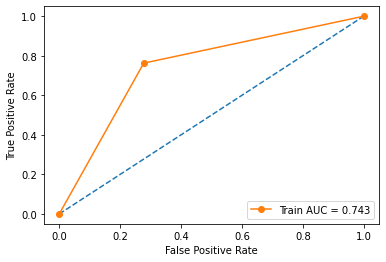

In [134]:

bert_fpr_train,bert_tpr_train,roc_val_bert = ROC_Curve(y_test,y_predicted)

# ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.859
SVM: ROC AUC=0.854
DecisionTree: ROC AUC=0.767
RandomTree: ROC AUC=0.852
XGBoost: ROC AUC=0.827
LSTM GLOVE: ROC AUC=0.882
LSTM GLOVE: ROC AUC=0.743


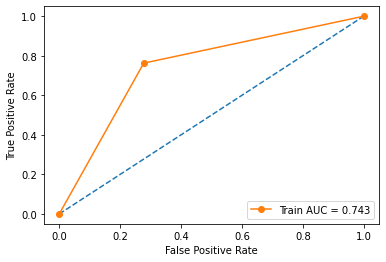

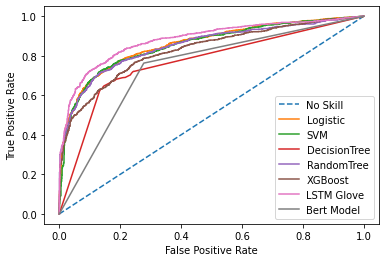

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


ns_probs = [0 for _ in range(len(cv_test_y))]
'''
lr_pred_y_prob = cus_en_lr.predict_proba(cv_test_X)
svm_pred_y_prob = cus_en_svm.predict_proba(cv_test_X)
dt_pred_y_prob = cus_en_dt.predict_proba(tfidf_test_X)
rd_pred_y_prob = cus_en_rd.predict_proba(cv_test_X)
xgb_pred_y_prob = cus_xgb_clf.predict_proba(pca_w2v_test_X)
lstm_glv_pred_y_prob
'''
lr_probs = lr_pred_y_prob[:, 1]
svm_probs = svm_pred_y_prob[:, 1]
dt_probs = dt_pred_y_prob[:, 1]
rd_probs = rd_pred_y_prob[:, 1]
xgb_probs = xgb_pred_y_prob[:, 1]

# calculate scores
ns_auc = roc_auc_score(cv_test_y, ns_probs)

lr_auc = roc_auc_score(cv_test_y, lr_probs)
svm_auc = roc_auc_score(cv_test_y, svm_probs)
dt_auc = roc_auc_score(cv_test_y, dt_probs)
rd_auc = roc_auc_score(cv_test_y, rd_probs)
xgb_auc = roc_auc_score(cv_test_y, xgb_probs)
lstm_glv_auc = roc_auc_score(cv_test_y, lstm_glv_pred_y_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('DecisionTree: ROC AUC=%.3f' % (dt_auc))
print('RandomTree: ROC AUC=%.3f' % (rd_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
print('LSTM GLOVE: ROC AUC=%.3f' % (lstm_glv_auc))
print('LSTM GLOVE: ROC AUC=%.3f' % (roc_val_bert))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(cv_test_y, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(cv_test_y, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(cv_test_y, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(tfidf_test_y, dt_probs)
rd_fpr, rd_tpr, _ = roc_curve(cv_test_y, rd_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(pca_w2v_test_y, xgb_probs)
lstm_glv_fpr, lstm_glv_tpr, _ = roc_curve(pad_y_test, lstm_glv_pred_y_prob)
bert_fpr_train,bert_tpr_train,roc_val_bert = ROC_Curve(y_test,y_predicted)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, label='Logistic')

pyplot.plot(svm_fpr, svm_tpr, label='SVM')
pyplot.plot(dt_fpr, dt_tpr, label='DecisionTree')
pyplot.plot(rd_fpr, rd_tpr, label='RandomTree')
pyplot.plot(xgb_fpr, xgb_tpr, label='XGBoost')
pyplot.plot(lstm_glv_fpr, lstm_glv_tpr, label='LSTM Glove')
pyplot.plot(bert_fpr_train,bert_tpr_train,label="Bert Model")
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

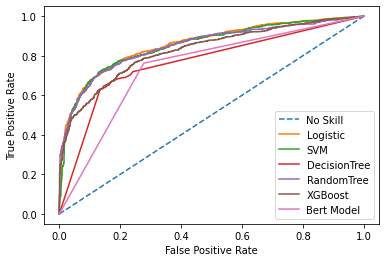

In [138]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

pyplot.plot(lr_fpr, lr_tpr, label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, label='SVM')
pyplot.plot(dt_fpr, dt_tpr, label='DecisionTree')
pyplot.plot(rd_fpr, rd_tpr, label='RandomTree')
pyplot.plot(xgb_fpr, xgb_tpr, label='XGBoost')
pyplot.plot(bert_fpr_train,bert_tpr_train,label="Bert Model")


#pyplot.plot(lstm_glv_fpr, lstm_glv_tpr, marker='.', label='LSTM Glove')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

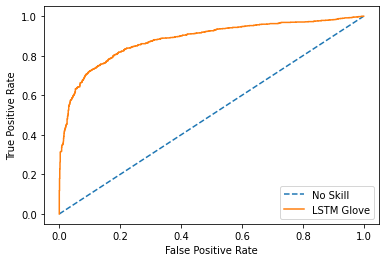

In [139]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
'''
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='DecisionTree')
pyplot.plot(rd_fpr, rd_tpr, marker='.', label='RandomTree')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
'''
pyplot.plot(lstm_glv_fpr, lstm_glv_tpr, label='LSTM Glove')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()